In [5]:
%reload_ext autoreload
%autoreload 2

from comet_ml import Experiment
import h5py
import matplotlib.pyplot as plt
import numpy as np
import argparse
import importlib
import random
import os
from algorithms.server.server import Server
from algorithms.trainmodel.models import *
from utils.plot_utils import *
import torch
torch.manual_seed(0)

def main(experiment, dataset, algorithm, model, batch_size, learning_rate, alpha, eta, L, rho, num_glob_iters,
         local_epochs, optimizer, numedges, times, commet, gpu):

    device = torch.device("cuda:{}".format(gpu) if torch.cuda.is_available() and gpu != -1 else "cpu")

    for i in range(times):
        print("---------------Running time:------------",i)

        # Generate model
        if(model == "mclr"):
            if(dataset == "human_activity"):
                model = Mclr_Logistic(561,6).to(device), model
            else:
                model = Mclr_Logistic().to(device), model

        if(model == "linear_regression"):
            model = Linear_Regression(40,1).to(device), model

        if model == "logistic_regression":
            model = Logistic_Regression(300).to(device), model
        
        if model == "MLP" and dataset == "a9a":
            model = DNN( input_dim = 123, output_dim = 2).to(device), model
        if model == "MLP" and dataset == "human_activity":
            model = DNN( input_dim = 561, mid_dim = 561, output_dim = 6).to(device), model
        if model == "MLP" and dataset == "w8a":
            model = DNN( input_dim = 300, output_dim = 2).to(device), model
        if model == "MLP" and dataset == "Mnist":
            model = DNN().to(device), model
        if model == 'CNN':
            model = Net().to(device), model
        # select algorithm
        if(commet):
            experiment.set_name(dataset + "_" + algorithm + "_" + model[1] + "_" + str(batch_size) + "b_" + str(learning_rate) + "lr_" + str(alpha) + "al_" + str(eta) + "eta_" + str(L) + "L_" + str(rho) + "p_" +  str(num_glob_iters) + "ge_"+ str(local_epochs) + "le_"+ str(numedges) +"u")
        server = Server(experiment, device, dataset, algorithm, model, batch_size, learning_rate, alpha, eta,  L, num_glob_iters, local_epochs, optimizer, numedges, i)
        
        server.train()
        server.test()


In [6]:
sophia_params = {
    "dataset": "human_activity",
    "algorithm": "Sophia",
    "model": "MLP",
    "batch_size": 64,
    "learning_rate": 0.0001,
    "alpha": (0.9, 0.95),
    "eta": 1.0,
    "L": 0.001,
    "rho": 20,
    "num_glob_iters": 41,
    "local_epochs": 1,
    "optimizer": "Sophia",
    "numedges": 30,
    "times": 1,
    "commet": True,
    "gpu": 0
}



DONE_params = {
    "dataset": "human_activity",
    "algorithm": "DONE",
    "model": "MLP",
    "batch_size": 64,
    "learning_rate": 0.001,
    "alpha": 0.003,
    "eta": 1.0,
    "L": 1e-3,
    "rho": 0.01,
    "num_glob_iters": 41,
    "local_epochs": 1,
    "optimizer": "DONE",
    "numedges": 30,
    "times": 1,
    "commet": True,
    "gpu": 0
}

GD_params = {
    "dataset": "human_activity",
    "algorithm": "GD",
    "model": "MLP",
    "batch_size": 64,
    "learning_rate": 0.01,
    "alpha": 0.03,
    "eta": 20.0,
    "L": 1e-3,
    "rho": 0.01,
    "num_glob_iters": 41,
    "local_epochs": 1,
    "optimizer": "DONE",
    "numedges": 30,
    "times": 1,
    "commet": True,
    "gpu": 0
}

'''
Newton_params = {
    "dataset": "Mnist",
    "algorithm": "Newton",
    "model": "MLP",
    "batch_size": 0,
    "learning_rate": 1,
    "alpha": 0.03,
    "eta": 1.0,
    "L": 1e-3,
    "rho": 0.01,
    "num_glob_iters": 500,
    "local_epochs": 40,
    "optimizer": "Newton",
    "numedges": 30,
    "times": 1,
    "commet": True,
    "gpu": 0
}

'''

'\nNewton_params = {\n    "dataset": "Mnist",\n    "algorithm": "Newton",\n    "model": "MLP",\n    "batch_size": 0,\n    "learning_rate": 1,\n    "alpha": 0.03,\n    "eta": 1.0,\n    "L": 1e-3,\n    "rho": 0.01,\n    "num_glob_iters": 500,\n    "local_epochs": 40,\n    "optimizer": "Newton",\n    "numedges": 30,\n    "times": 1,\n    "commet": True,\n    "gpu": 0\n}\n\n'

In [7]:
experiment = Experiment(
        api_key="q24VqIVkFNEOugLA3T0YFFFvE",
        project_name="sophia",
        workspace="abdulmomen96",
    )
main(experiment, **GD_params)
experiment.end()    


COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/abdulmomen96/sophia/e1ad384da31c4a9bb117e5a1cedd864b



---------------Running time:------------ 0
Number of edges / total edges: 30  /  30
-------------Round number:  0  -------------
Average Global Accuracy          :  0.15015479876160992
Average Global Trainning Accuracy:  0.15152300712896954
Average Global Trainning Loss    :  1.7974495453256643
-------------Round number:  1  -------------
Average Global Accuracy          :  0.19156346749226005
Average Global Trainning Accuracy:  0.19118600129617627
Average Global Trainning Loss    :  1.774768105962411
-------------Round number:  2  -------------
Average Global Accuracy          :  0.19311145510835914
Average Global Trainning Accuracy:  0.19429682436811407
Average Global Trainning Loss    :  1.7548835719782891
-------------Round number:  3  -------------
Average Global Accuracy          :  0.19930340557275542
Average Global Trainning Accuracy:  0.19948152948801037
Average Global Trainning Loss    :  1.7371184887394686
-------------Round number:  4  -------------
Average Global Accuracy 

Average Global Trainning Accuracy:  0.6421257290991574
Average Global Trainning Loss    :  1.3893522409672716
-------------Round number:  39  -------------
Average Global Accuracy          :  0.6443498452012384
Average Global Trainning Accuracy:  0.6449773169151004
Average Global Trainning Loss    :  1.381512273169151
-------------Round number:  40  -------------
Average Global Accuracy          :  0.6478328173374613
Average Global Trainning Accuracy:  0.6474400518470512
Average Global Trainning Loss    :  1.3737497721565133


COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/abdulmomen96/sophia/e1ad384da31c4a9bb117e5a1cedd864b
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     glob_acc [41]   : (0.15015479876160992, 0.6478328173374613)
COMET INFO:     loss [123]      : (1.3091683387756348, 1.8002140522003174)
COMET INFO:     train_acc [41]  : (0.15152300712896954, 0.6474400518470512)
COMET INFO:     train_loss [41] : (1.3737497721565133, 1.7974495453256643)
COMET INFO:   Others:
COMET INFO:     Name : human_activity_GD_MLP_64b_0.01lr_0.03al_20.0eta_0.001L_0.01p_41ge_1le_30u
COMET INFO:   Uploads:
COMET INFO:     conda-environment-definition : 1
COMET INFO:     conda-info                   : 1

In [4]:
'''
Sophia
-------------Round number:  40  -------------
Average Global Accuracy          :  0.6722136222910217
Average Global Trainning Accuracy:  0.6764744005184705
Average Global Trainning Loss    :  1.0025231767457874


GD
-------------Round number:  40  -------------
Average Global Accuracy          :  0.20936532507739938
Average Global Trainning Accuracy:  0.20764744005184704
Average Global Trainning Loss    :  1.7220779072828905


'''

'\nSophia\n-------------Round number:  40  -------------\nAverage Global Accuracy          :  0.6722136222910217\nAverage Global Trainning Accuracy:  0.6764744005184705\nAverage Global Trainning Loss    :  1.0025231767457874\n\n\nGD\n-------------Round number:  40  -------------\nAverage Global Accuracy          :  0.20936532507739938\nAverage Global Trainning Accuracy:  0.20764744005184704\nAverage Global Trainning Loss    :  1.7220779072828905\n\n\n'

In [1]:
from utils.plot_utils import get_training_data_value, simple_read_data

In [4]:


rs_train_acc_sop, rs_train_loss_sop, rs_glob_acc_sop = simple_read_data("human_activity_Sophia_0.0001_(0.9, 0.95)_1.0_0.001_30u_64b_1_0")
rs_train_acc_gd, rs_train_loss_gd, rs_glob_acc_gd = simple_read_data("human_activity_GD_0.01_0.03_20.0_0.001_30u_64b_1_0")

human_activity_Sophia_0.0001_(0.9, 0.95)_1.0_0.001_30u_64b_1_0
human_activity_GD_0.01_0.03_20.0_0.001_30u_64b_1_0


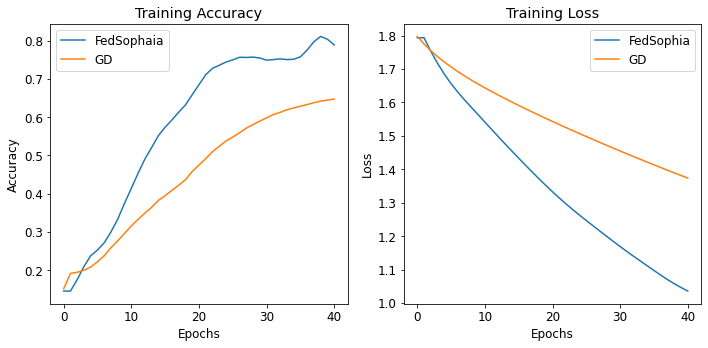

<Figure size 432x288 with 0 Axes>

In [6]:

import matplotlib.pyplot as plt


# Create a figure with two subplots
plt.figure(figsize=(10, 5))

# Subplot 1: Training Accuracy
plt.subplot(1, 2, 1)
plt.plot(rs_train_acc_sop, label='FedSophaia')
plt.plot(rs_train_acc_gd, label='GD')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Subplot 2: Training Loss
plt.subplot(1, 2, 2)
plt.plot(rs_train_loss_sop, label='FedSophia')
plt.plot(rs_train_loss_gd, label='GD')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


plt.tight_layout()
plt.show()
